# Introduction: Crypoasset Analysis 
     By: Derek Lorenzen  
     For: Digital Assets Data  
     Jr. Data Scientist Position  

### About Me
I have always been interested in finance and cryptocurrencies but I am not a quantitative analyst by trade; I am a mechanical engineer with a degree in economics. Seeking to grow my programming skills and data science literacy, I recently completed the Galvanize Data Science Immersive. The program takes place over 3 months and opens for investigation all aspects of data science. Naturally, I focused on artificial intelligence and it's place in finance. I believe both this experience in coordination with a well honed scientific analysis background complement my desire to understand the cryptoasset market and make me a hard working, enthusiastic applicant to the Digital Assets Data team. 
    
### Motivation
The integration of blockchain based digital value stores into the classical finance world is perpetually making waves. As investors look to trade the cryptoasset space, they will be in need of visualizations and metrics. To this end, I will employ a JavaScript based visualization package, Altair, and program in the most commonly seen classical finance indicators to evaluate their use in cryptoasset trading.  

>It is my contention that due to the fundamentally different nature of blockchain as a store of value, the industry favorite indicators may not be directly applicable. In this sense, I hope to find an optimized indicator for trading. After showing the application of the RSI, SMA, and EMA, I will use a custom gridsearch technique to test new period combinations for use in a crossover strategy. 

The data are ripe for exploration. I have chosen a very limited project due to time and ability constraints, though I am aware of the sheer number of topics to explore.

### Implications and Future Work
To my knowledge, cryptoassets are traded similarly to foreign exchange markets in that one is betting on the rate of exchange between two assets though this is one of the few similarities between the spaces. Some key differences to note are:
1. Cryptoassets store value but are not backed by tangible goods, revenue streams, or countries. 
    > I expect to see a higher frequency of momentum reversal as the uncertainty in valuation could increase the variance in price.  
3. Regulation has not caught up to the market so insider/outsider effects may be magnified. 
    > Pulls of the market and sudden reversals may exist. In my opinion to reduce risk one must trade at a higher frequency. 
4. (The Big One) Price Effects: Markets remain open, no splits or dividends occur, money supply changes by asset, money market forces are complicated by miners, transaction stream, and highly varying demand. 
    > Since the trading is continuous in time, historical (daily resolution) data is not at risk of nightly discontinuities making it more informative for indicator use. As a result, the main complication is the obscuring  of information due to resampling. 

In addition to these known differences, I also include the idea of technological differences between assets as both creating a barrier to entry for traders and adding a type of a non-trivial implicit value.
1. Entry level traders are unfamiliar with the process of trading cryptoassets and likely the technology…
2. Cryptoassets may be similar to stocks in that cryptoasset “fundamentals” exist by means of the use, novelty, and technological design of the asset yet these data remain obscured without a hefty comprehension of the technology. 

In reality, one could spend months investigating any one of the above differences. Because of this, I will limit my scope to finding new periods for the commonly used crossover moving average trading strategy and conveying my findings in Altair. 

### Pointed Summary
In this notebook, I will explore a data set containing market data for 11 cryptoassets as requested by the Digital Assets Data team.  
Focusing on the learning and use of visualization package, Altair, I begin by adding in some of the more classical indicators. 
1. Industry Baseline
    * SMA - The Simple Moving Average
2. Industry Favorite
    * EMA - The Exponential Moving Average
3. Industry Valuation Metric
    * RSI - Relative Strength Index
> Note: My focus on Indicators alone is supported by the contrast between market variables and blockchain variables. As a brief explanation, I seek here to find a strategy applicable to cryptoassets not a single cryptoasset. If you scroll to the bottom, pair plots are included of the more exotic variables. Said plots do not suggest a broad statistical regressor would capture anything and instead almost ensure hard clustering would yield high accuracy.   
    
Honing in on the Exponential Moving Average, I evaluate its use in the cryptoasset space by running two lightweight procedures: 
1. Trade Execution on Crossover
    * Traders often use a pair of moving averages to signal a change in market direction. There are two crossovers in the valuation sense of moving average strategies, crossovers where the short-term signal passes down through the long-term signal (Sell) and the compliment; the short-term signal rises through the long-term signal (Buy). 
2. Deviation From Classical Finance Period Baselines
    * Utilizing the golden ratio as the inspiration for a type of grid search, many periods are tested for the exponential moving average.  
    
By searching the periods, it was found that a statistically significant period cuttoff exists between 12-13 periods for the short term exponential moving average and 19-21 periods for the long term exponential moving average. 
> The quicker the period pair, the better the trades are on average with a severe detriment occuring by using periods of longer span than the stated limits.

# Setup
The main packages for this project are:
> Pandas  
NumPy  
Altair  
seaborn  
scikit-learn  

In [1]:
# Making Changes to Altair Theme
def calm_theme():
    mark_color = '#222d35'
    return {'config': {
                        'view': {
                            'height': 400,
                            'width': 400
                        },
                        'title': {
                            'fontSize': 16,
                            'anchor': 'end'
                        },
                        'axis': {
                            'labelFontSize': 12,
                            'titleFontSize': 14
                        },
                        'legend': {
                            'labelFontSize': 12,
                            'titleFontSize': 14

                        },
                    }
            }

print('(^ Altair Setup){This notebook has some collapsed cells}')

(^ Altair Setup){This notebook has some collapsed cells}


In [2]:
# Imports
import sys
sys.path.append('./src')
import re
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from Indicators import Indicators
from scipy.stats import ttest_ind

# MPL Setup
%matplotlib inline  
plt.style.use('ggplot')

# Altair Setup
alt.renderers.enable('notebook')
alt.themes.register('calm_theme', calm_theme)
alt.themes.enable('calm_theme')

# Pandas Setup
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print('(^ Imports){To expand, select cell then click the [^] arrow in toolbar}')

(^ Imports){To expand, select cell then click the [^] arrow in toolbar}


## Data Overview
The data is composed of two spreadsheets, 'market_data.csv' and 'blockchain_data.csv'. Observations in this dataset range from January 1st, 2018 through February 19th, 2019. A wide preview is included for ease of reference. 

In [3]:
# Data Sources
market = pd.read_csv('data/market_data.csv')
blockchain = pd.read_csv('data/blockchain_data.csv')

The above reads in data from the repository's data folder.   
The 'market' CSV is a historical table of daily observations spanning variables related either to price, exchange volume, or transaction count and spans 11 assets: 
Bitcoin, Cardano, Dash, EOS, Ethereum, Litecoin, NEO, Ripple, Stellar, TRON, and Zcash. 

In [4]:
print('Market Data Shape: ', market.shape)
market.head(12)

Market Data Shape:  (4563, 17)


base_asset_id    quote_asset_id                epoch_ts   price_open   price_high    price_low  price_close  price_mean_a  price_std  price_vwap_a  price_vwap_h  cnt_total  volume_total   volume_high    volume_low  volume_mean_a    volume_std
0    Bitcoin_BTC_BTC  USDollar_USD_USD  2019-02-19 00:00:00+00  3932.714647  4093.592472  3841.540000  3947.838332   3982.976819  42.843054   3992.851593   3992.331372     505918  1.016199e+05  3.309573e+02  1.800000e-09       0.245708      1.312071
1    Cardano_ADA_ADA  USDollar_USD_USD  2019-02-19 00:00:00+00     0.046611     0.051831     0.044664     0.046850      0.047804   0.000686      0.047779      0.047767      89496  4.697049e+08  1.680672e+06  1.000000e-01    6162.362937  18885.346700
2     Dash_DASH_DASH  USDollar_USD_USD  2019-02-19 00:00:00+00    87.616371    91.952000    85.849339    88.389405     88.486393   0.926142     88.470100     88.459994      23643  3.341039e+04  2.255077e+02  1.000000e-08       1.737967      5.353673
3        EOS_EOS_EOS  USDollar_USD_USD  2019-02-19 00:00:00+00     3.550629     4.077906     3.401717     3.596504      3.677321   0.061916      3.678656      3.677503     378772  4.808927e+07  3.771251e+04  1.000000e-08     187.935652    547.250706
4   Ethereum_ETH_ETH  USDollar_USD_USD  2019-02-19 00:00:00+00   148.700401   154.305449   141.927303   145.123666    148.814893   1.650709    149.044636    149.023308     578049  1.743712e+06  2.000000e+03  1.000000e-08       4.172325     15.892995
5   Litecoin_LTC_LTC  USDollar_USD_USD  2019-02-19 00:00:00+00    48.192801    61.517811    36.169266    48.046467     48.366702   0.656276     48.407775     48.396480     194864  1.296146e+06  1.792219e+03  1.000000e-08       8.902979     29.462538
6        NEO_NEO_NEO  USDollar_USD_USD  2019-02-19 00:00:00+00     8.963390     9.867577     8.538050     9.061386      9.143871   0.131962      9.145463      9.143403      82431  2.435887e+06  5.458066e+03  3.000000e-08      36.245576     92.092298
7     Ripple_XRP_XRP  USDollar_USD_USD  2019-02-19 00:00:00+00     0.328831     0.372683     0.313581     0.328842      0.338636   0.006919      0.338941      0.338790     432190  4.141837e+08  3.381149e+05  1.000000e-08    1068.058289   3257.453203
8    Stellar_XLM_XLM  USDollar_USD_USD  2019-02-19 00:00:00+00     0.085477     0.100649     0.083569     0.091535      0.090382   0.002859      0.090494      0.090406     160011  3.557663e+08  1.036664e+06  1.000000e-08    2432.634571   8965.081910
9       TRON_TRX_TRX  USDollar_USD_USD  2019-02-19 00:00:00+00     0.025494     0.027993     0.023796     0.025319      0.025796   0.000342      0.025801      0.025795      95849  1.114902e+09  3.145976e+06  1.000000e-08   12400.157059  35206.629752
10     Zcash_ZEC_ZEC  USDollar_USD_USD  2019-02-19 00:00:00+00    55.509081    63.854849    53.423103    54.796506     55.843013   0.490101     55.795887     55.790087      20948  6.201106e+04  8.422192e+02  1.300000e-07       3.689678     13.586368
11   Bitcoin_BTC_BTC  USDollar_USD_USD  2019-02-18 00:00:00+00  3661.759485  4047.577154  3616.180000  3895.634695   3848.588236  80.176886   3856.053627   3854.317528     448895  1.089819e+05  2.000000e+02  2.600000e-09       0.311224      1.623624

Our 'blockchain' CSV is also historical and covers the same date range but is composed of different variables.   Among the variables are statistics involving the blockchain transaction volume, transaction fees, block rewards, and asset supply. The CSV contains only data on 5 of the above 11 assets:  
Bitcoin, Dash, Ethereum, Litecoin, and Zcash

In [5]:
print('Blockchain Data Shape: ', blockchain.shape)
blockchain.head(9)

Blockchain Data Shape:  (2075, 23)


asset_id                epoch_ts    volume_sum    volume_high  volume_low  volume_mean_q  volume_mean_a  volume_mean_g  volume_mean_h   volume_std  coinbase_volume  txn_count      fee_sum  fee_high  fee_low  fee_mean_q  fee_mean_a  fee_mean_g  fee_mean_h   fee_std  block_reward_sum  supply_total  blockchain_size
0   Bitcoin_BTC_BTC  2019-02-19 00:00:00+00  1.780234e+06   11837.005536    0.000000      74.281965       5.112060       0.054446   1.404571e-03    74.105958      1986.592950     348242    36.592950  0.055191      0.0    0.000445    0.000105    0.000039    0.000016  0.000433       1950.000000  1.754774e+07     193912854133
1    Dash_DASH_DASH  2019-02-19 00:00:00+00  3.388989e+05   12879.641105    0.000000     324.575946      23.654558       0.173700   3.251968e-03   323.724144      1852.955010      14327     2.839200  0.037780      0.0    0.001894    0.000206    0.000009    0.000007  0.001883       1850.115799  8.310922e+06       8295434127
2  Ethereum_ETH_ETH  2019-02-19 00:00:00+00  2.787835e+06   28467.000000    0.000000     137.359364       5.180472       0.223269   8.359763e-15   137.261767     13536.031250     538143  2387.291689  0.160157      0.0    0.012248    0.004436    0.001707    0.001073  0.011416      13536.031250  3.327931e+07      73831306948
3  Litecoin_LTC_LTC  2019-02-19 00:00:00+00  4.954276e+06   81336.280258    0.000005    2483.321168     187.243515       2.332579   2.150916e-02  2476.298780     15142.664114      26459    17.664114  0.100000      0.0    0.003460    0.000683    0.000154    0.000027  0.003392      15125.000000  6.056878e+07      18246202449
4     Zcash_ZEC_ZEC  2019-02-19 00:00:00+00  2.372777e+06   78641.216993    0.000000    5599.490387     611.540576       4.954945   2.860419e-02  5566.713338      7251.090570       3880     1.090570  0.071174      0.0    0.002287    0.000330    0.000062    0.000015  0.002263       7250.000000  5.931475e+06      18321777658
5   Bitcoin_BTC_BTC  2019-02-18 00:00:00+00  1.187294e+06    4346.670682    0.000000      34.616319       3.448690       0.049894   1.547531e-03    34.444151      1966.904101     344274    29.404101  0.112050      0.0    0.000599    0.000085    0.000027    0.000012  0.000593       1937.500000  1.754579e+07     193786067976
6    Dash_DASH_DASH  2019-02-18 00:00:00+00  2.891833e+05   13070.331976    0.000000     260.312988      21.524625       0.187790   2.578225e-03   259.431209      1822.776412      13435     2.770986  0.067380      0.0    0.001918    0.000215    0.000009    0.000006  0.001906       1820.005415  8.309072e+06       8281540377
7  Ethereum_ETH_ETH  2019-02-18 00:00:00+00  3.021452e+06   70844.148693    0.000000     194.316456       5.845082       0.239747   7.168515e-15   194.228713     13307.843750     516922  2467.652294  0.160001      0.0    0.012970    0.004774    0.001741    0.001045  0.012060      13307.843750  3.326577e+07      73725904942
8  Litecoin_LTC_LTC  2019-02-18 00:00:00+00  4.330423e+06  175200.879259    0.000005    2281.302351     162.042472       2.456053   2.594263e-02  2275.582655     15119.184938      26724    19.184938  0.168516      0.0    0.003756    0.000734    0.000186    0.000042  0.003684      15100.000000  6.055365e+07      18231051077

## Data Preparation
Within make_df.py, I perform standard procedures like interpreting the date of the transaction and sorting by increasing date. 

In [6]:
%run -i make_df.py

Due to the missing asset variables, an outer join would produce NaN values or missing entries for numerous columns. The following heatmap shows positionally by index and column where missing values arise. 

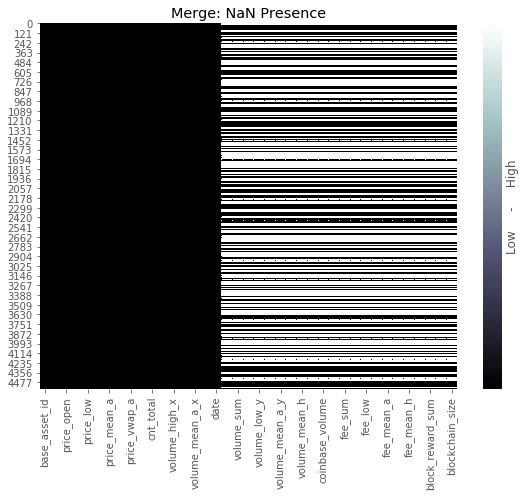

In [7]:
# In-Notebook Example of Nulls for Basic Outer Join
# Outer Join
composite_test = market.merge(blockchain, how='outer', left_on=['base_asset_id', 'date'], right_on=['asset_id','date'])
# Nulls heatmap
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(composite_test.isnull(), 
            cmap='bone', 
            vmin=0, vmax=1, 
            ax=ax, 
            cbar_kws={'ticks':[], 'label':'Low     -     High'})
ax.set_title('Merge: NaN Presence')
fig.tight_layout()

One must join on date and base_asset_id to complete the dataset. In the interest of evaluating the presence of missing dates instead of dropping them as is common in inner/left/right joins, a date-preserving manual join on 'base_asset_id' was used.  
This resulted in cohesive data across time and column. 

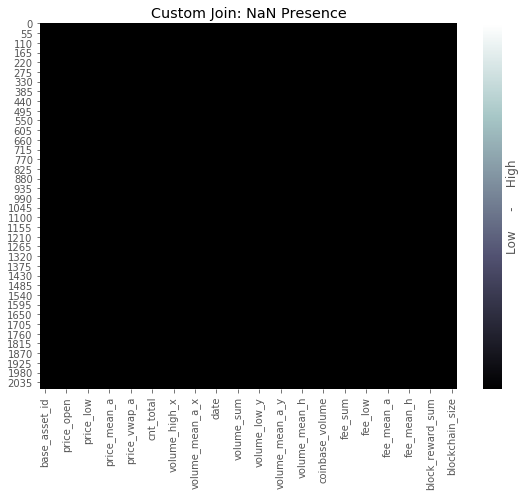

In [8]:
# Plot of Date Preserving Asset Join
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(composite.isnull(),
            cmap='bone',
            vmin=0, vmax=1,
            ax=ax,
            cbar_kws={'ticks':[], 'label':'Low     -     High'})
ax.set_title('Custom Join: NaN Presence')
fig.tight_layout()

## Exploratory Data Analysis
From pair plots of market based data (Price, Volume, Transaction Count) we see that the assets may be ripe for traditional finance indicators. The correlation between the variables has healthy variance, and little striation.  

Judging by the decrease in the density of points as one moves to the top right on each plot, the data may test positive for heteroskedasticity. That being said, no machine learning models were run on the data so the implications of this are left for future verification. 

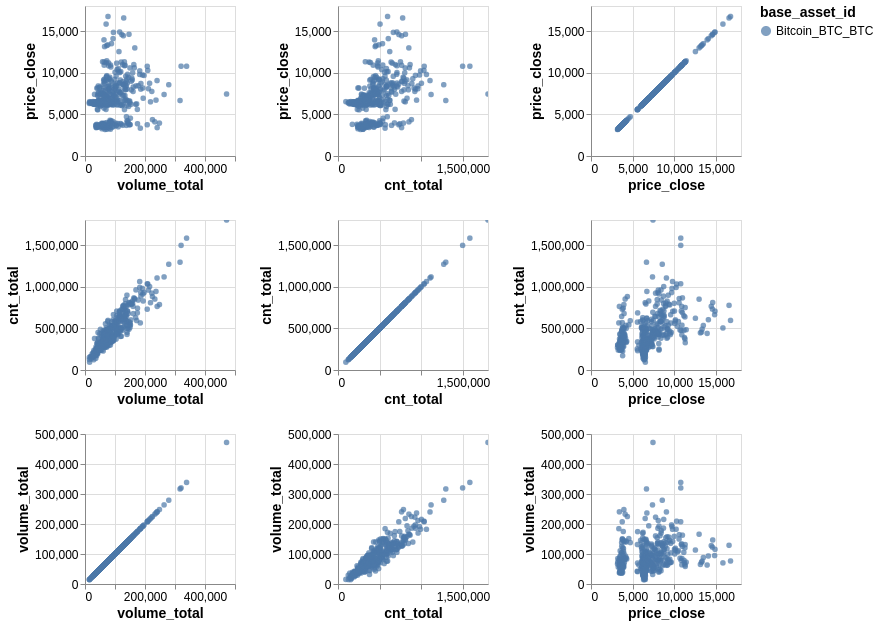

In [9]:
cols = ['price_close', 'cnt_total', 'volume_total']
alt.Chart(composite[composite['base_asset_id'] == 'Bitcoin_BTC_BTC']).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='base_asset_id:N'
).properties(
    width=150,
    height=150,
).repeat(
    row=cols,
    column=cols[::-1]
).interactive()

Since Bitcoin is the market leader and a type of reserve currency for cryptoasset-cryptoasset exchanges, it has been plotted by itself and with the group. In proceeding sections, Bitcoin will be of primary focus for technical evaluation. 

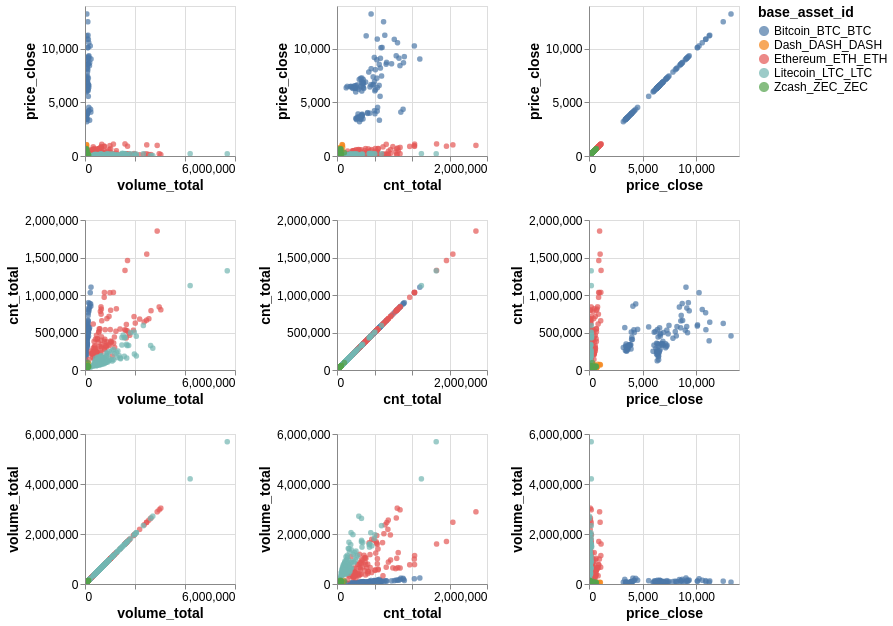

In [10]:
asset_sample = composite.groupby('base_asset_id').apply(lambda x: x.sample(100)).reset_index(drop=True)
alt.Chart(asset_sample).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='base_asset_id:N'
).properties(
    width=150,
    height=150,
).repeat(
    row=cols,
    column=cols[::-1]
).interactive()

The bulk of the assets show similar distributions yet differing relationships. This confirms that indicators may be applicable by asset. 

That being said, it was discovered that the 'price_low' variable within this older dataset was corrupted in a number of assets. After confirming that the data was immediately fixed by the team, I proceeded to visually represent the disparity in a timeframe of December 2018. 

In [11]:
'''Data provided free by: https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20181201&end=20181231'''
test = '''Date	Open*	High	Low	Close**	Volume	Market Cap
Dec 31, 2018	3,866.84	3,868.74	3,725.87	3,742.70	4,661,840,806	65,331,499,158
Dec 30, 2018	3,822.38	3,901.91	3,797.22	3,865.95	4,770,578,575	67,475,512,827
Dec 29, 2018	3,932.49	3,963.76	3,820.41	3,820.41	4,991,655,917	66,672,244,158
Dec 28, 2018	3,653.13	3,956.14	3,642.63	3,923.92	5,631,554,348	68,471,837,969
Dec 27, 2018	3,854.69	3,874.42	3,645.45	3,654.83	5,130,222,366	63,768,757,101
Dec 26, 2018	3,819.67	3,893.36	3,769.86	3,857.30	5,326,547,918	67,292,819,465
Dec 25, 2018	4,081.03	4,089.56	3,760.02	3,815.49	6,158,207,293	66,556,033,172
Dec 24, 2018	4,000.33	4,271.79	4,000.33	4,078.60	7,240,968,501	71,137,548,589
Dec 23, 2018	4,020.99	4,085.72	3,976.41	3,998.98	6,151,275,490	69,741,217,417
Dec 22, 2018	3,898.08	4,014.18	3,855.74	4,014.18	5,605,823,233	69,997,508,295
Dec 21, 2018	4,133.70	4,198.43	3,850.95	3,896.54	7,206,015,706	67,937,650,255
Dec 20, 2018	3,742.20	4,191.23	3,728.97	4,134.44	8,927,129,279	72,078,243,771
Dec 19, 2018	3,706.82	3,949.32	3,687.23	3,745.95	6,810,689,119	65,299,132,785
Dec 18, 2018	3,544.76	3,701.35	3,487.17	3,696.06	5,911,325,473	64,422,587,801
Dec 17, 2018	3,253.12	3,597.92	3,253.12	3,545.86	5,409,247,918	61,798,926,687
Dec 16, 2018	3,236.27	3,305.75	3,233.82	3,252.84	3,744,248,994	56,685,436,644
Dec 15, 2018	3,244.00	3,275.38	3,191.30	3,236.76	3,551,763,561	56,400,691,425
Dec 14, 2018	3,311.75	3,329.56	3,206.54	3,242.48	4,372,763,663	56,494,379,457
Dec 13, 2018	3,487.88	3,489.74	3,298.13	3,313.68	4,343,372,456	57,728,688,216
Dec 12, 2018	3,421.46	3,534.23	3,413.48	3,486.95	4,139,364,829	60,741,625,426
Dec 11, 2018	3,497.55	3,513.18	3,392.25	3,424.59	4,696,765,188	59,650,201,102
Dec 10, 2018	3,612.05	3,647.33	3,470.14	3,502.66	5,020,968,740	61,004,445,982
Dec 09, 2018	3,473.23	3,685.31	3,469.09	3,614.23	4,947,372,847	62,942,160,928
Dec 08, 2018	3,421.91	3,506.04	3,350.65	3,476.11	5,305,024,497	60,531,278,392
Dec 07, 2018	3,512.59	3,512.59	3,280.23	3,419.94	6,835,615,448	59,547,645,578
Dec 06, 2018	3,754.07	3,874.97	3,521.10	3,521.10	5,878,333,109	61,303,965,508
Dec 05, 2018	3,958.89	3,969.54	3,753.99	3,753.99	5,302,481,574	65,352,496,336
Dec 04, 2018	3,886.29	4,075.63	3,832.75	3,956.89	5,028,069,239	68,878,292,608
Dec 03, 2018	4,147.32	4,155.98	3,840.45	3,894.13	5,089,570,994	67,779,050,170
Dec 02, 2018	4,200.73	4,301.52	4,110.98	4,139.88	5,262,697,895	72,050,487,506
Dec 01, 2018	4,024.46	4,309.38	3,969.71	4,214.67	5,375,314,093	73,346,194,969'''

print('(^ Recent Coinbase Data)')

(^ Recent Coinbase Data)


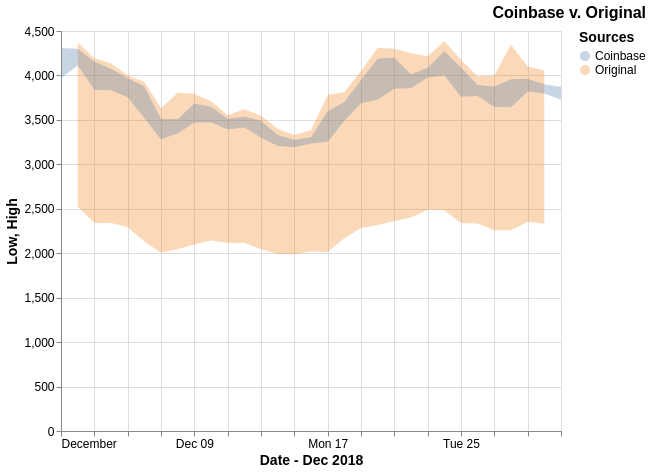

In [12]:
import re
import pandas as pd
lines = re.split('\n+', test)
symbols = re.split('\t+', lines[0])
data = pd.DataFrame(columns=symbols)
for line in lines[1:]:
    instance = {}
    line_list = re.split('\t+', line)
    for j in range(len(symbols)):
        if j == 0:
            instance['Date'] = [pd.to_datetime(line_list[j], infer_datetime_format=True)]
        else:
            instance[symbols[j]] = [float(line_list[j].replace(',',''))]
    data = data.append(pd.DataFrame(instance))
bitcoin = composite[composite['base_asset_id'] == 'Bitcoin_BTC_BTC']
btc_new = data.sort_values(by='Date')[['Date','Low','High']]
btc_check = bitcoin[(
    bitcoin['date'] > min(btc_new['Date'])) & (
    bitcoin['date'] < max(btc_new['Date']))][['date', 'price_low', 'price_high']]

btc_new['blank_legend_item'] = ['Coinbase']*len(btc_new)
btc_check['blank_legend_item'] = ['Original']*len(btc_check)

btc_new_altair = alt.Chart(btc_check).mark_area(color='blue', opacity=0.3).encode(
    alt.X('date:T', title='Date - Dec 2018'),
    alt.Y('price_low:Q', title='Low'),
    alt.Y2('price_high:Q', title='High'),
    color=alt.Color('blank_legend_item')
)
btc_altair = alt.Chart(btc_new).mark_area(color='black', opacity=0.3).encode(
    alt.X('Date:T', title=None),
    alt.Y('Low:Q', title=None),
    alt.Y2('High:Q', title=None),
    color=alt.Color('blank_legend_item', title='Sources')
).properties(title='Coinbase v. Original', width=500)

btc_new_altair + btc_altair

As such, in future candlestick charts, please ignore the low threshold. 

## Concept Review
In review, the distributions of the market variables across assets suggest that forecasting techniques such as moving averages may be able to find signal.   
Bitcoin will be the baseline due to it being the industry standard cryptocurrency.  
Though the data I currently hold has some discrepancies in the low price by day, the database is presumed to be correct. 

# Indicators

In [13]:
periods = {
    'sma':5,
    'sma_long':8,
    'ema':13,
    'ema_long':21,
    'wilder_rsi':14
    # all hail the fib sequence
    }
# Indicators Class
composite = Indicators(composite, periods).add_indicators()


print('(^ Make Indicators)')

(^ Make Indicators)


## Industry Favorites (Are they possible in Altair?)

#### RSI: Relative Strength Index.
This indicator is very commonly used to show momentum in traditional stock price. Most RSI's calculated professionally contain the Wilder Smoothing Factor as suggested in the white paper.  
Formula:  
"Index" - $100 - 100/(1 + RS)$  
"Relative Strength" - $ Average Gain / Average Loss $  
"Average Gain/Loss" - EMA Using $Alpha = 1/N$ for Smoothing

#### SMA: Simple Moving Average
This is an indicator performing directly on the price variable of interest. It "simply" averages the observed values within a given window as the window slides through the data. Thus...it is a moving average filter.   
Formula:  
SMA: $(P_1 + P_2 ... P_N)/N$

#### EMA: Exponential Moving Average
The exponential moving average is an industry favorite due to it's hyperparameter adjustability. Most tend to engineer the formula to weight recent values with a specific importance metric called the weight or smoothing factor. For finance, this is $2/(N+1)$.  

Formula:  
$(Price - EMA_{prev})*factor + EMA_{prev}$  
The calculation is rolling but starts with the SMA to get an initial value calculated above. 

Aside: 
The astute may wonder how and why the above is an "exponential"...   
Recall the taylor series expansion of $e^{mx} = 1 + mx + (mx)^2/{2!}...$
This is a more general form of what's known as a geometric series.   
As an approximator, typically the first term is the most drastic/closest mover, the following just slowly hone in on the true value. As such, the first term is the most important. If the variable of interest is recent observations, a geometric progression captures recent moves quickly. 
This geometric relationship describes the nuance behind "weighting recent changes more heavily".

### RSI (Bitcoin)

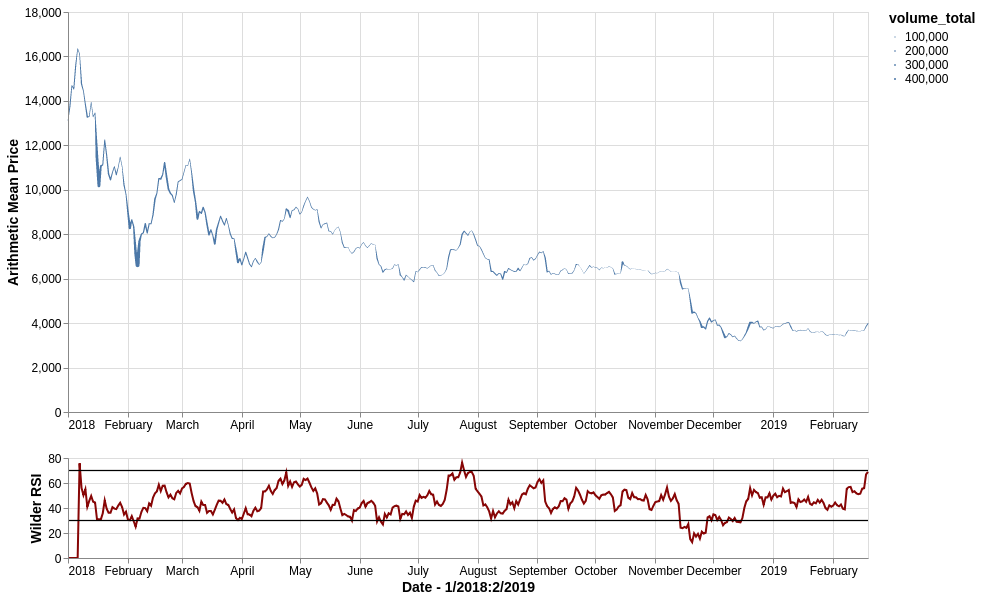

In [14]:
# Prepare
bitcoin = composite[composite['base_asset_id'] == 'Bitcoin_BTC_BTC']
thresholds = pd.DataFrame([{'low': 30,'high': 70,'mid': 50}])
min_date = str(min(bitcoin['date']).month) + '/' + str(min(bitcoin['date']).year)
max_date = str(max(bitcoin['date']).month) + '/' + str(max(bitcoin['date']).year)
# Plot
price = alt.Chart(bitcoin).mark_trail().encode(
        x=alt.X('date:T', title=None),
        y=alt.Y('price_mean_a:Q', axis=alt.Axis(title='Arithmetic Mean Price')), # another way
        size='volume_total:Q'
    ).properties(
        width=800,
        height=400
)
rsi_base = alt.Chart(bitcoin).mark_line(
        color='#870606',
        size=2
    ).encode(
        x=alt.X('date:T', title = 'Date - {}:{}'.format(min_date, max_date)),
        y=alt.Y('wilder_rsi:Q', title='Wilder RSI')
    ).properties(
        width=800,
        height=100
)
low_rsi = alt.Chart(thresholds).mark_rule(
        color='#000000',
        size=1.25, 
    ).encode(
        y=alt.Y('low:Q', title=None)
)
high_rsi = alt.Chart(thresholds).mark_rule(
        color='#000000',
        size=1.25
    ).encode(
        y=alt.Y('high:Q', title=None)
)

rsi = rsi_base + low_rsi + high_rsi

price & rsi

The above plot shows the price data complemented by the momentum oscillator, RSI. The thickness in the line denoting price is mapped to volume traded on the day. Traditional thresholds of 30 for oversold and 70 for overbought appear accurate. 

### SMA (Bitcoin)

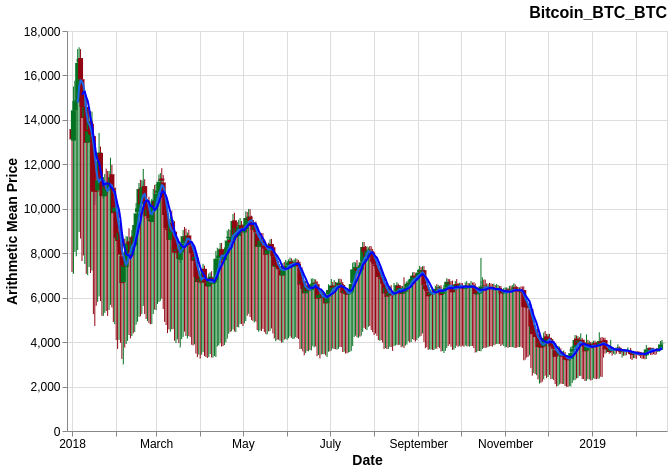

In [15]:
plot_ind(bitcoin, 'sma_s', 'sma_l')

The above simple moving average should be interactive and with it you can see the filtered trends in the data. As the SMA acts like a low pass filter, lag is present at the rate of $N/2$. In other words, if the window extends back in time, all a simple average can do is give you the middle price (mean, not mode. Included for semantic purpose) which would occur half of the window back in time. 

### EMA (Across Asset)

The exponential moving average has slightly less lag at $(N-1)/2$. This means it will be approximately a half a day ahead of the simple moving average. In practice, this is additive and the indicator response more quickly to changes in signal. 
The EMAs for baseline testing are a 13/21 pair. One EMA is calculated on the past 13 days of data and the other; on 21. 

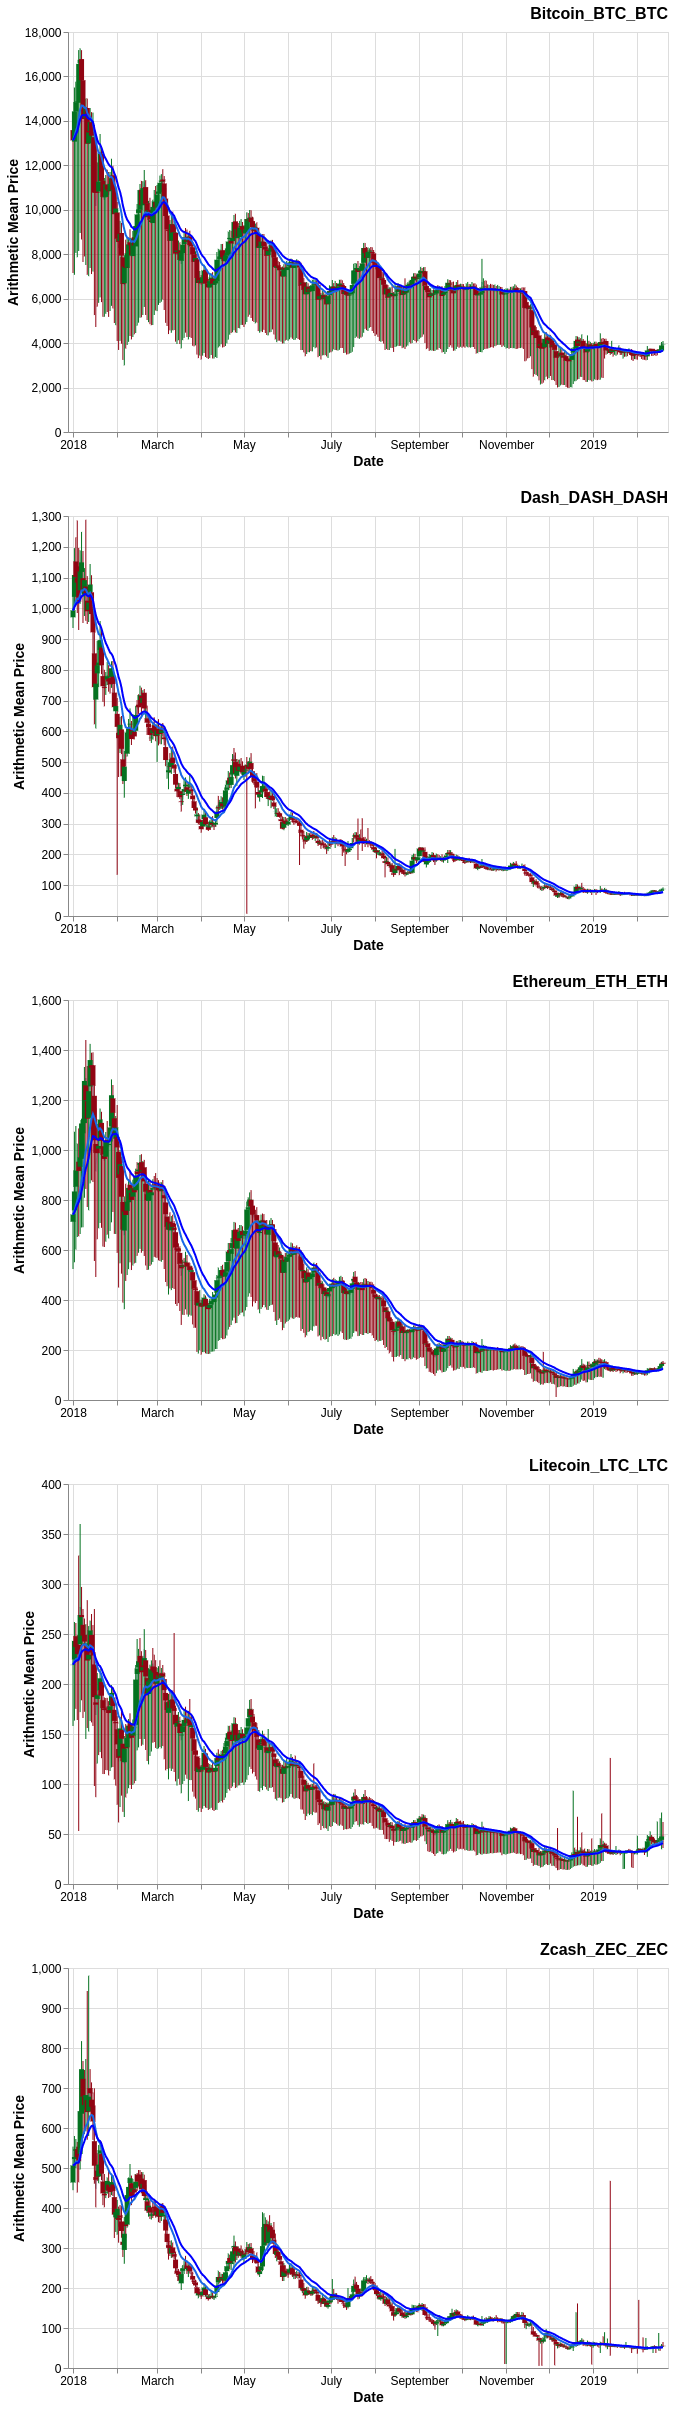

In [16]:
symbols = composite['base_asset_id'].astype('category').cat.categories
plots = alt.vconcat()
for asset in symbols:
    plots &= plot_ind(composite[composite['base_asset_id'] == asset], 'ema_s', 'ema_l')
plots

These EMAs show good promise in identifying trends but appear to be too lagged and too slow for the typical swing trader. This can be seen by the irresponsiveness in March of 2018 where the two moving averages barely tend towards each other even though an almost week long reversal occured. Expansion around this will be covered in the next section. 

## Testing

### Trade Simulations (Bitcoin)
In order to easily backtest a change in period for our EMAs, one can simply maintain a ledger of profits and trades. The buy and sell signals will be produced by the crossover of the two EMAs. 

It is understood that when the short term EMA drops down through the long term EMA, one should sell. This is derived from notions of value in that if the long term EMA is passed by the short term EMA, a change in valuation occured among the collective traders. The downward movement being associated with selling arises from the short term average price falling in relation to the long term average price (the recent prices are lower than the long term prices). The complement in logic signifies a buy signal. 

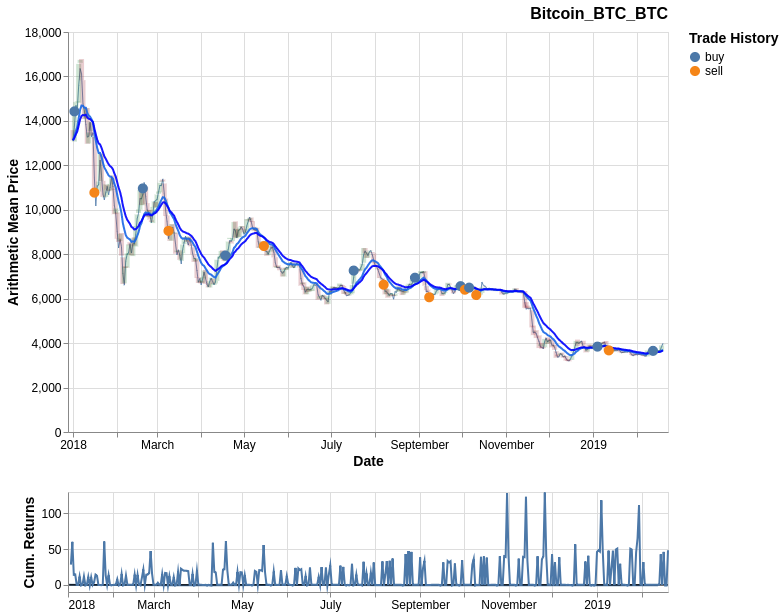

In [17]:
record = trade_sim(bitcoin, 'ema_s', 'ema_l', 'price_close', 'base_asset_id')
plot_ind_trade(bitcoin, record, 'ema_s', 'ema_l')

While studying this plot of trade marks, I came to the conclusion that filter lag is the salient reason trades are occuring well after a raw price reversal. Consequently, I perform a modified gridsearch.   
> Note: Any filter lags the signal as previously stated. In the case of the EMA, the lag is $(N-1)/2$ or slightly better than the simple moving average's $N/2$. This is not uncommon, and is seen often in circuitry (EMA being a low pass filter) when a rotation is observed in the complex plane between input and output oscillatory signals. 

The period values I used were 13/21 which differ from the common 12/26.
I did this by design; 21 follows 13 in the fibonacci sequence. As a consequence, when 13 is divided into 21, the output is approximately the golden ratio.  

By observing the curves, one can see a nicely responsive signal yet a signal that is too smoothed and significantly lagged.    

I search on both sides of the short period value of 13, and maintain a period ratio equal to that of the golden ratio.  

In [18]:
sequence = [[i, i*1.618] for i in range(1,21)] # Golden Ratio
ema_testing = market[['base_asset_id', 'price_close', 'date']].copy()
ema_record = pd.DataFrame(columns=['index', 'date', 'trade', 'price', 'profit', 'asset', 'pair'])
for pair in sequence:
    period_short, period_long = pair
    # Exponential moving average
    ema_testing['price_ema_short'.format(period_short)] = (ema_testing.groupby('base_asset_id')
                                                        .apply(lambda x: x['price_close']
                                                        .ewm(span=period_short, 
                                                             adjust=False).mean())
                                                        .reset_index(level=0, drop=True))
    # Long exponential moving average
    ema_testing['price_ema_long'.format(period_long)] = (ema_testing.groupby('base_asset_id')
                                                             .apply(lambda x: x['price_close']
                                                             .ewm(span=period_long, 
                                                                  adjust=False).mean())
                                                             .reset_index(level=0, drop=True))
    bitcoin_testing = ema_testing[ema_testing['base_asset_id'] == 'Bitcoin_BTC_BTC']
    this_record = trade_sim(bitcoin_testing, 'price_ema_short', 'price_ema_long', 'price_close', 'base_asset_id')
    this_record['pair'] = ['{},  {}'.format(round(pair[0],4), round(pair[1],4))]*len(this_record)
    ema_record = ema_record.append(this_record, ignore_index=True)
ema_record_pair = ema_record.sort_values('pair')

print('(Search Algorithm)')

/home/walt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(Search Algorithm)


Performing the trading simulation on each of the periods mentioned previously, we can plot the trace of profits throughout time. If a trade is executed on the crossover of the two moving averages, we can extract the profit from the trade and plot the general course. 

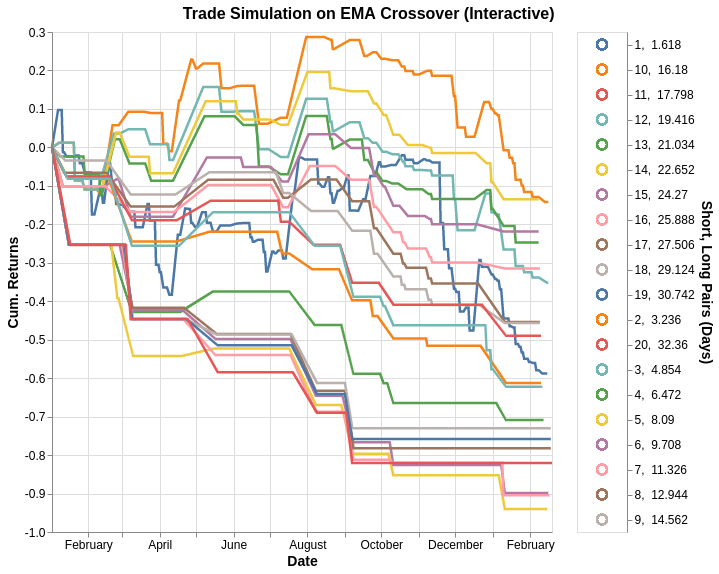

In [19]:
# Plotting
height = 500
selection = alt.selection_multi(fields=['pair'])
color = alt.condition(selection,
                      alt.Color('pair:N', legend=None),
                      alt.value('lightgray'))
trade_chart = alt.Chart(ema_record).mark_line(size=2.5).encode(
    alt.X('date:T', title='Date'),
    alt.Y('return:Q', title='Cum. Returns'),
    color=color
).properties(
    width=500,
    height=height,
    title='Trade Simulation on EMA Crossover (Interactive)'
).add_selection(
    selection
)
legend = alt.Chart(ema_record).mark_point(size=100).encode(
    y=alt.Y('pair:N', axis=alt.Axis(orient='right'), title='Short, Long Pairs (Days)'),
    color=color
).properties(
    width=50,
    height=height,
).add_selection(
    selection
)
trade_chart | legend

The above simulations show a distinct cutoff between pairs (12,19) and (13,21). To reiterate, these are the periods passed into the EMA calculation or the size of the window looking back in time used to calculate the moving average. 

To be certain of the difference, we can group the periods below the cutoff together and separate them from those above the cutoff. Then by calculating the mean return of the two groups we can perform a T-test to use against the null hypothesis. 

$H_0: E(\mu_A)-E(\mu_B) = 0$   
$H_a: E(\mu_A)-E(\mu_B) != 0$  
$\alpha = 0.05$

In [20]:
print('Grouping and Calculating summary stats...')
pair_return = ema_record[['pair','return']].copy()
pair_return['return'] = pair_return['return'].astype(float)
means = pair_return.groupby('pair').mean().reset_index().rename(columns={'return':'mean'})
stds = pair_return.groupby('pair').std().reset_index().rename(columns={'return':'std'})
pair_return = means.merge(stds, left_on='pair', right_on='pair')
pair_return['group'] = pair_return['pair']
for i, row in pair_return.iterrows():
    group = 0
    if int(row['group'].replace(',','').split()[0]) < 13:
        group = 1
    pair_return.at[i,'group'] = group
T, P = ttest_ind(pair_return[pair_return['group'] == 0]['mean'], pair_return[pair_return['group'] == 1]['mean'], equal_var=False)
print('Test Statistic: ', round(T, 3), '\n', 'P-Value: ', '{:0.3e}'.format(P))

print('\n\n (^ Statistics Calculation)')

Grouping and Calculating summary stats...
Test Statistic:  -7.918 
 P-Value:  7.451e-07


 (^ Statistics Calculation)


With the above, we reject the null in favor of the alternative hypothesis. The samples of means across the two groups are statistically different at the one and two-tailed significance levels. 

## Concept Review

By running trading simulations on Bitcoin, we can analyze the impact of changing the periods of the EMAs in the crossover strategy. Further, the diversion in outcome between EMAs with period pairs less than (13/21) appears to be detrimental to growing profits. 

# Conclusion & Extras  

## Conclusion
By analysing the correlations between the pertinent market variables, we concluded that traditional finance indicators may be applicable to cryptoassets.   

The use of RSI, SMA, and EMAs on cryptoassets prove promising if they are modified to fit the new realm of cryptoasset exchanges. 

EMAs, being an industry favorite, seem to respond well if one diverges from typical period lengths in favor of quicker oscillations. 

On the cryptocurrency, Bitcoin, the use of EMA indicators in a crossover strategy with period pairs below (13/21) at the daily resolution proves promising as the means of samples in this range diverge from those with longer periods in a statistically significant manner. 

## Future Expansion
### Bitcoin Blockchain Variables
Though my time was limited, the blockchain based variables suggest many "fundamentals" for cryptoassets. Things like the money supply, transaction fees and block rewards being paid to miners, and exchange metadata can both serve to analyze trends within an asset (as seen by the nonlinearities in the following pair plots) and classify assets (by the clustering in the next pair plots). 

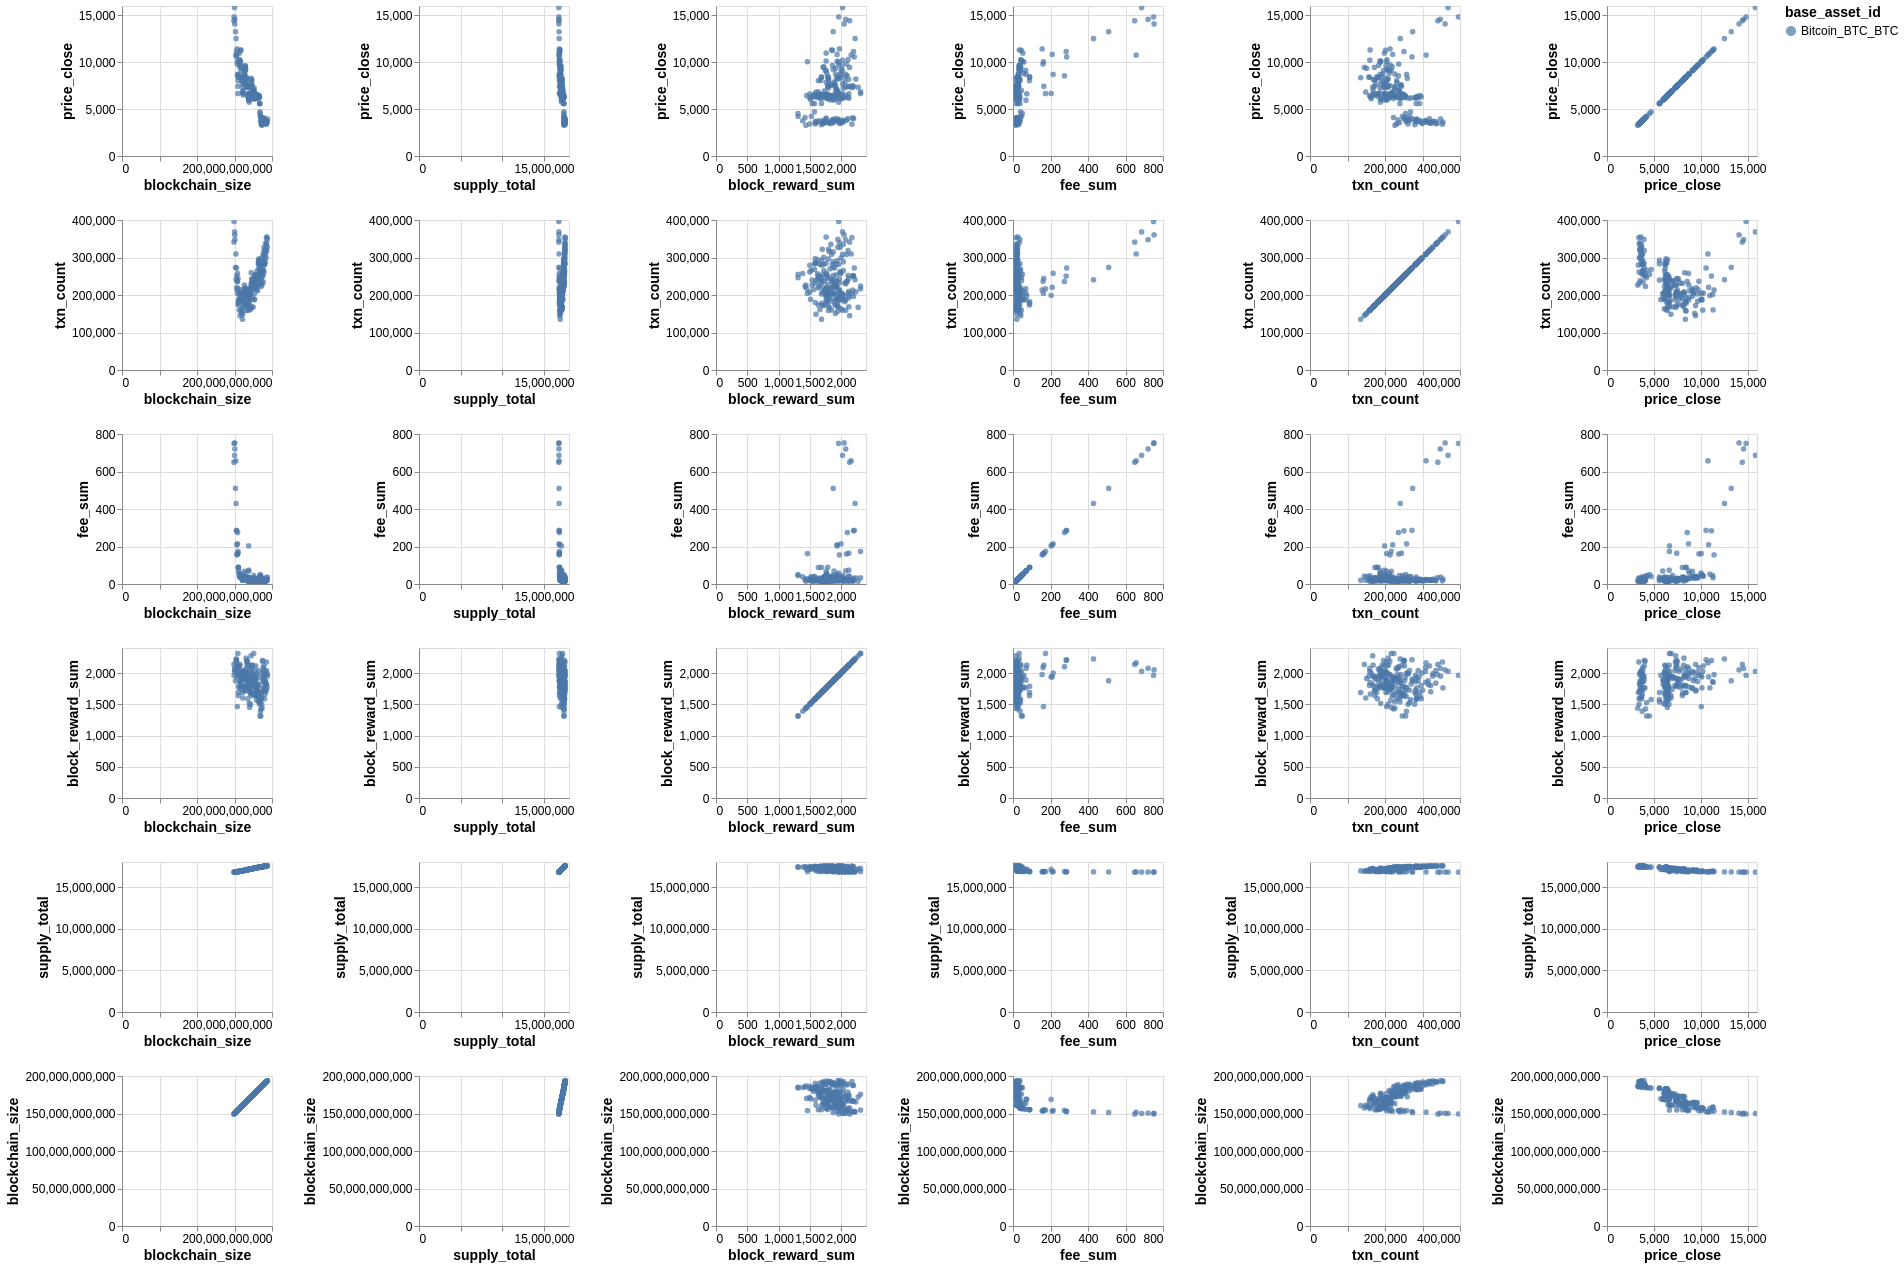

In [21]:
cols_exotic = ['price_close',
                 'txn_count',
                 'fee_sum',
                 'block_reward_sum',
                 'supply_total',
                 'blockchain_size']
alt.Chart(composite[composite['base_asset_id'] == 'Bitcoin_BTC_BTC'].sample(200)).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='base_asset_id:N'
).properties(
    width=150,
    height=150,
).repeat(
    row=cols_exotic,
    column=cols_exotic[::-1]
).interactive()

As can be seen in the above pair plots for Bitcoin, highly nonlinear relationships exist in most of the variables. Through classification techniques paired with transaction data from the blockchain itself, one may be able to surmise elusive information. Most of the results leading from these analyses I view as alpha; those with sophisticated access to market, blockchain, and exchange data will have a move planned before the rest of the pool. 

### Across-Asset Pair Plots on Blockchain Variables

A similar but more salient story exists for the other cryptocurrencies:

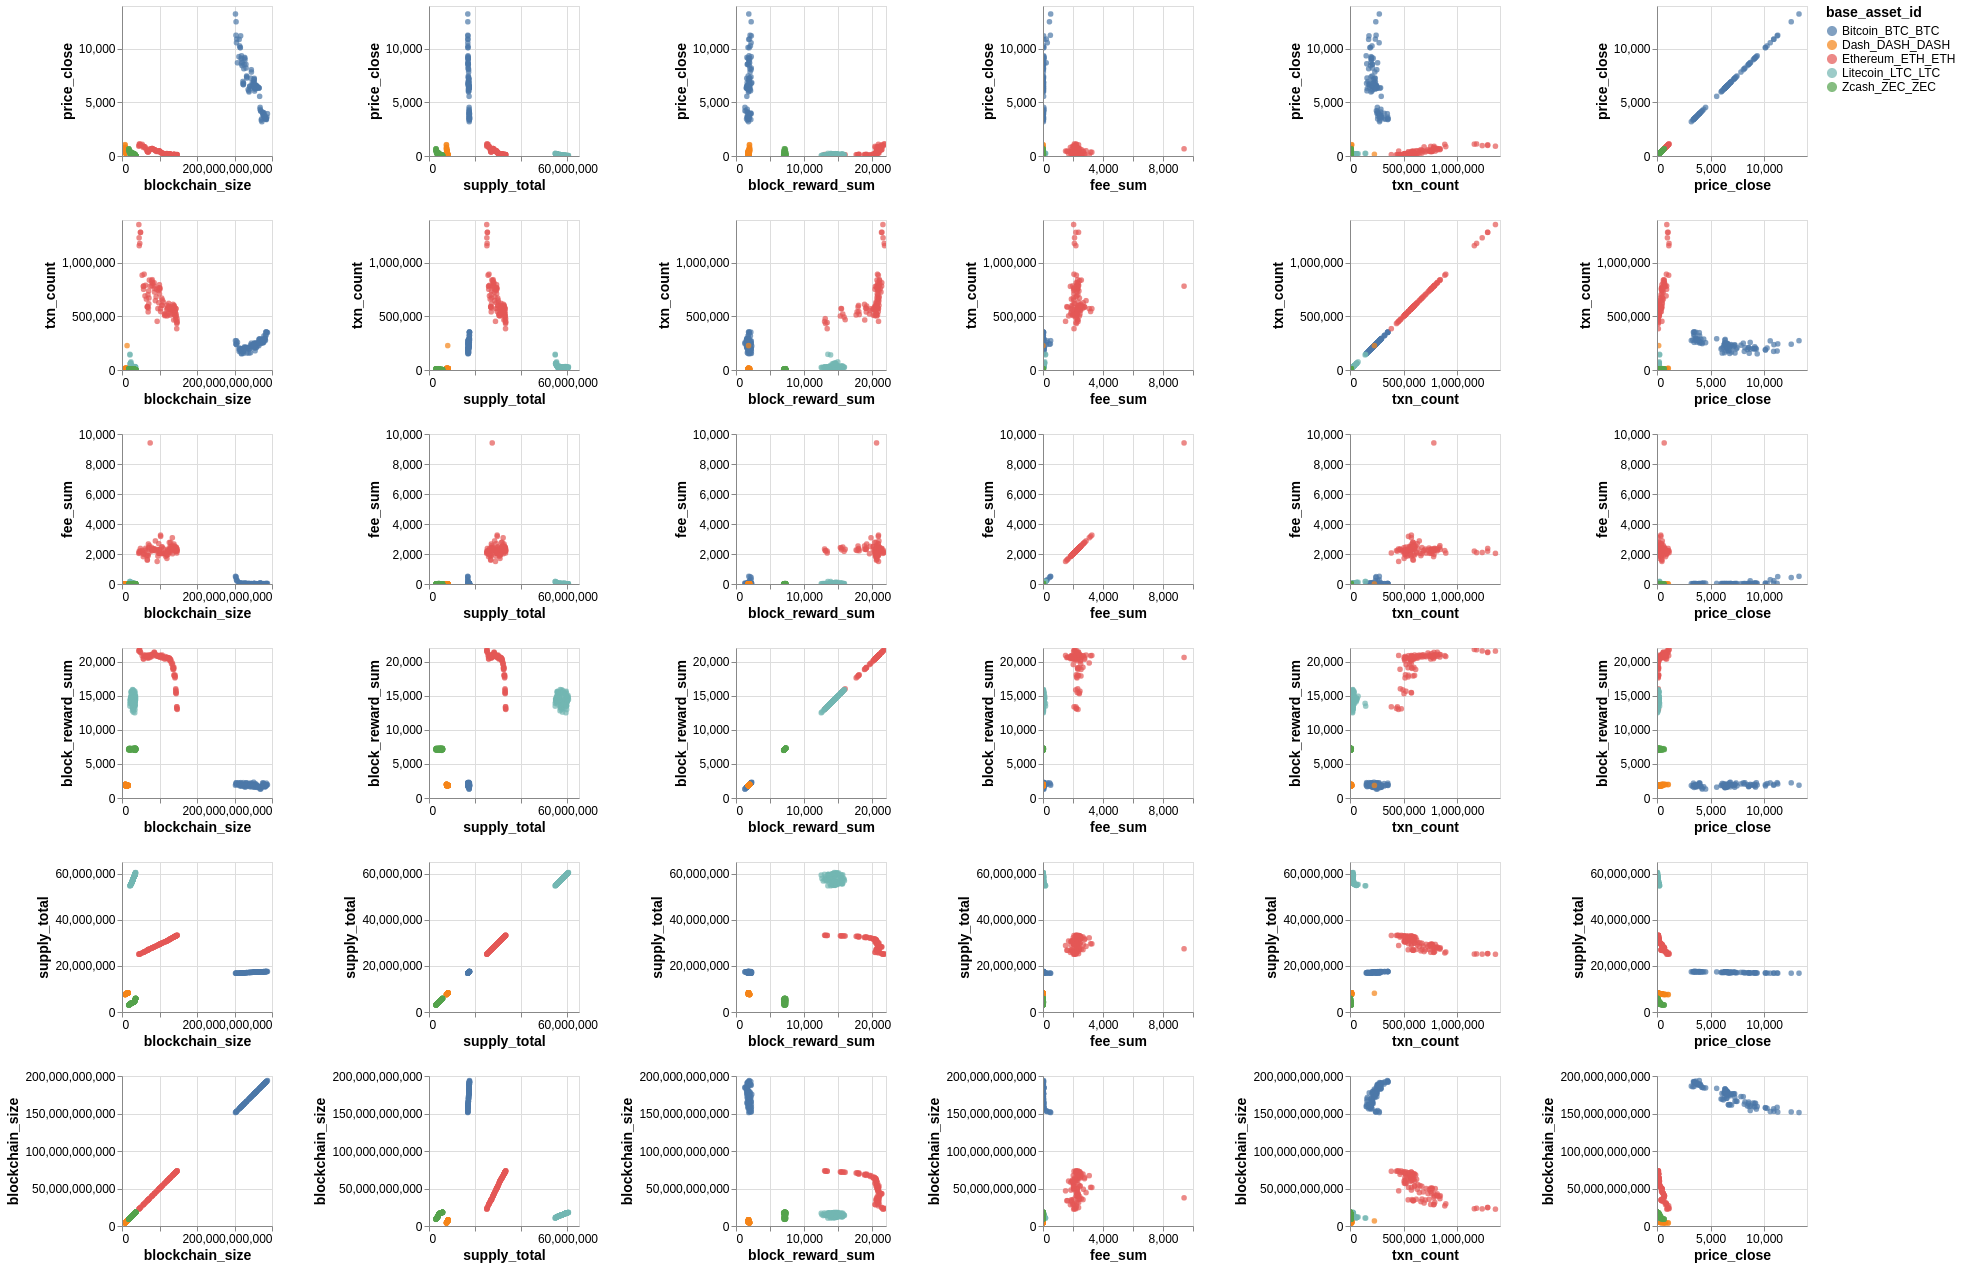

In [22]:
alt.Chart(asset_sample).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='base_asset_id:N'
).properties(
    width=150,
    height=150,
).repeat(
    row=cols_exotic,
    column=cols_exotic[::-1]
).interactive()

In these pair plots, we see difinitive, even non-overlapping clustering between assets. This segregates the market not into assets that follow the price of bitcoin but into a richly diverse space containing assets with distinquishing features ripe for exploration. Though their market variables are fit for traditional analysis, better signal may be gleaned by further clustering these 5 assets. 

## Thank you for your time!
Though learning Altair and some of the theory behind cryptoasset exchanges took more of my time than originally planned, I have attempted to put my best foot forward in this record. I appreciate the time the team took to iterview me and the opportunity to work on this project. 
I hope it was enjoyable! 